In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Make linear regression data

In [31]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=20, n_features=1, noise=25)

# My Class

In [68]:
class LinearRegressionClass:
    def __init__(self, θinit, X, y):
        self.X = X
        self.y = y
        self.m = len(X)
        self.θinit = θinit
        self.intercept_ = θinit[0]
        self.coef_ = θinit[1]
        
    # Class Methods
    def fit(self, α=0.1, max_iter=10**4, tols=10e-8):
        
        # Gradient descent
        θ_old = self.θinit
        for i in range(max_iter):
            θ_new = θ_old - α * self.__grad(θ_old)

            # Stopping criterion
            if np.linalg.norm(θ_new - θ_old) > tols:
                θ_old = θ_new

            else:
                break
            
        # best y-intercept and slope
        self.intercept_ = θ_new[0]
        self.coef_ = θ_new[1] 
        
        predicted_y = self.intercept_ + self.coef_*self.X
        
        # Compute for the linear regression model's score
        SS_res = 0
        for i in range(len(self.y)):
            SS_res += (y[i] - predicted_y[i])**2
            
        SS_tot = 0
        for i in range(len(self.y)):
            SS_tot += (y[i] - y.mean())**2
        
        self.R2 = 1 - (SS_res[0]/SS_tot)
    
    
    def predict(self, x_test):      
        return self.intercept_ + self.coef_*x_test

    
    # Private Methods    
    def __h(self, x, θ0t, θ1t): # Linear regression model
        '''
        h is the hypothesis
        x = input
        θ0 = y-intercept
        θ1 = slope

        Returns:
            y - the predicted value
        '''
        return θ0t + θ1t*x
        
        
    def __grad(self, θ): # Gradient of the cost function
        '''
        Evaluates the gradient of the cost function.
        '''
        # Derivatives of the cost function
        def DJDθ0(θt):
            Dθ0 = 0
            for i in range(self.m):
                Dθ0 += (self.__h(X[i], θt[0], θt[1]) - y[i])

            return (1/self.m) * Dθ0[0]

        def DJDθ1(θt):
            Dθ1 = 0
            for i in range(self.m):
                Dθ1 += (self.__h(X[i], θt[0], θt[1]) - y[i]) * X[i]

            return (1/self.m) * Dθ1[0]

        return np.array([DJDθ0(θ), DJDθ1(θ)])

# Test

<IPython.core.display.Javascript object>


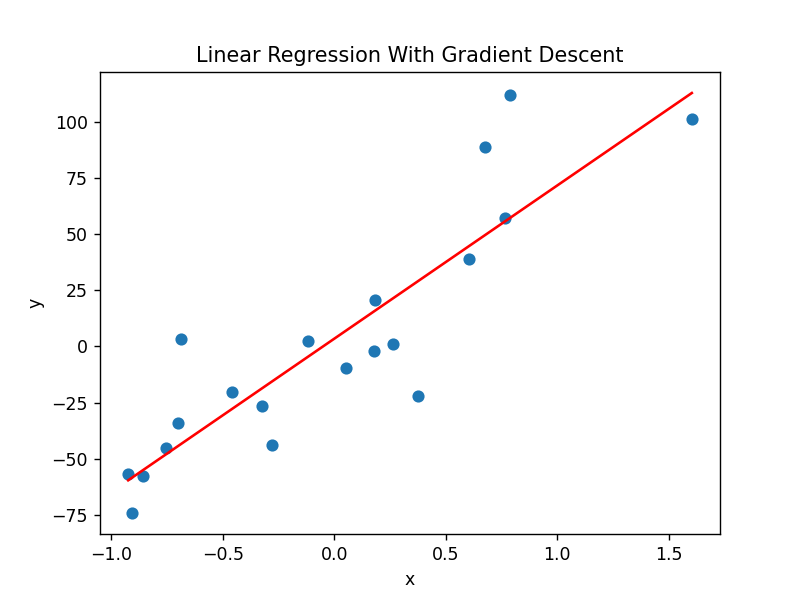

Text(0.5, 1.0, 'Linear Regression With Gradient Descent')

In [69]:
regtest = LinearRegressionClass([2,3], X, y)
regtest.fit()

plt.figure()
plt.scatter(X,y)

xs_line = np.linspace(np.min(X), np.max(X))
plt.plot(xs_line, regtest.intercept_ + regtest.coef_*xs_line, 'red')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression With Gradient Descent")

In [70]:
print(regtest.intercept_, regtest.coef_, regtest.R2)

3.404122411200411 68.28559704223623 0.7831261865202911


### Make a prediction

In [71]:
regtest.predict(np.array([2]))

array([139.9753165])

# Sci-kit learn

In [40]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X.reshape((-1, 1)), y)
print(reg.intercept_, reg.coef_[0], reg.score(X.reshape((-1, 1)), y))

3.4041225065794793 68.28559906218292 0.7831261865202916


### Make a prediction

In [41]:
reg.predict(np.array([2]).reshape(1, -1))[0]

139.97532063094533